# LIBS

In [ ]:

# plt.subplot(5, 1, 2)
# plt.imshow(np.clip(ux, 0, 1), cmap='hot', interpolation='bilinear')

# plt.subplot(5, 1, 3)
# plt.imshow(np.clip(uy, 0, 1), cmap='hot', interpolation='bilinear')

# vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
# vorticity[cylinder] = np.nan

# plt.subplot(5, 1, 4)
# plt.imshow(vorticity, cmap='RdBu', interpolation='bilinear')

# plt.subplot(5, 1, 5)
# plt.imshow(rho, cmap='RdBu', interpolation='bilinear')
# plt.colorbar()


In [2]:
str = ""
for i in range(1,32,1):
    str += f'toNumber(prop("{i}")) + ' 

str

'toNumber(prop("1")) + toNumber(prop("2")) + toNumber(prop("3")) + toNumber(prop("4")) + toNumber(prop("5")) + toNumber(prop("6")) + toNumber(prop("7")) + toNumber(prop("8")) + toNumber(prop("9")) + toNumber(prop("10")) + toNumber(prop("11")) + toNumber(prop("12")) + toNumber(prop("13")) + toNumber(prop("14")) + toNumber(prop("15")) + toNumber(prop("16")) + toNumber(prop("17")) + toNumber(prop("18")) + toNumber(prop("19")) + toNumber(prop("20")) + toNumber(prop("21")) + toNumber(prop("22")) + toNumber(prop("23")) + toNumber(prop("24")) + toNumber(prop("25")) + toNumber(prop("26")) + toNumber(prop("27")) + toNumber(prop("28")) + toNumber(prop("29")) + toNumber(prop("30")) + toNumber(prop("31")) + '

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


[0 1]


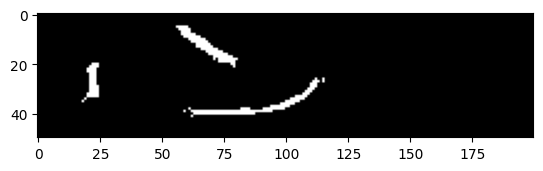

In [20]:
image = cv2.imread("base2.png",0)
image = cv2.resize(image, (200, 50))
image = np.invert(image.astype(np.uint8))
plt.imshow(image, cmap='gray')


image[image != 0] = 1
# image = image/255

plt.imshow(image.astype(np.uint8), cmap='gray')
# plt.imshow(image.astype(np.uint8), cmap='gray')
print(np.unique(image))
# imagePoints = np.invert(image.astype(np.uint8)).astype(np.float32)
# plt.imshow(np.invert(image.astype(np.uint8)), cmap='gray')
# y, x = np.where(imagePoints == 1)
# puntos = list(zip(y, x))


# LOAD IMAGE

(50, 200)


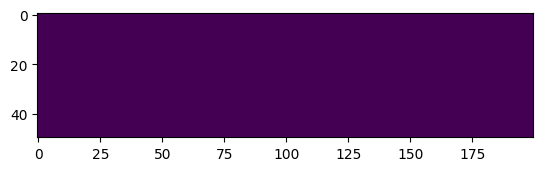

In [4]:


NX = 200
NY = 50
# plot_every = 50

image = cv2.imread("tesla_2.png", 0)
image = cv2.resize(image, (NX, NY))
image = image.astype(np.float32)

image[image != 255] = 0
image[image != 255] = 0
image = image/255

plt.imshow(image)
print(image.shape)
# imagePoints = cv2.rotate(image)

# y, x = np.where(imagePoints == 1)
# puntos = list(zip(y, x))
# plt.imshow(imagePoints)

# Image border points

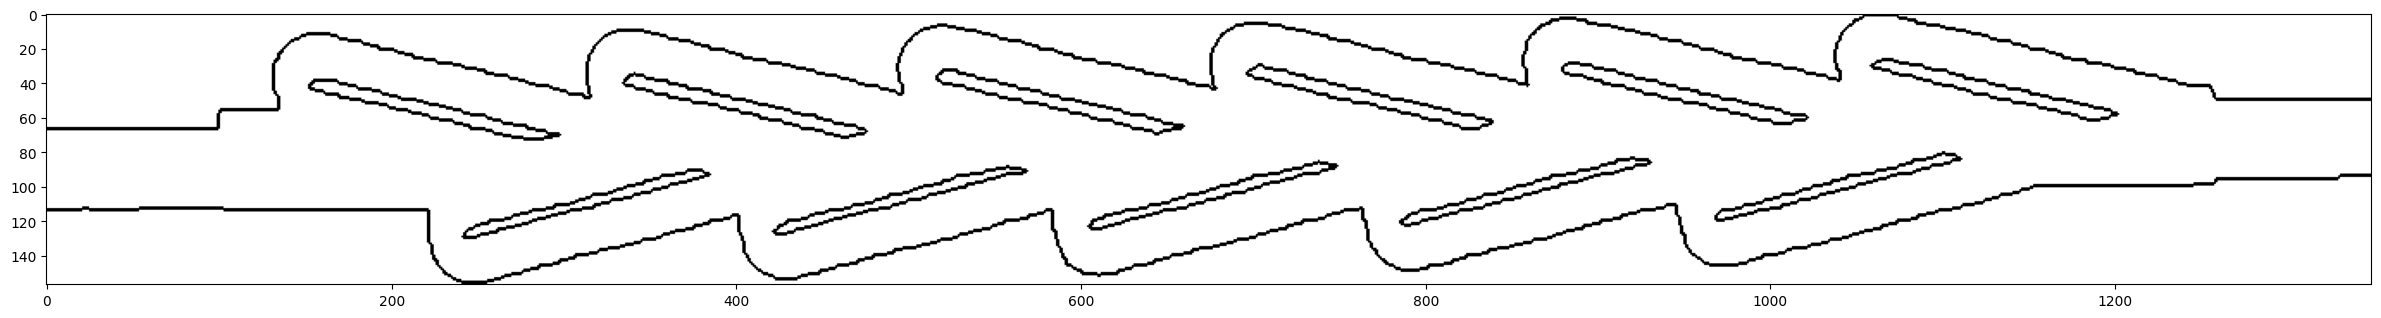

In [3]:
laplacian = cv2.Laplacian(image.astype(np.uint8), cv2.CV_64F)

plt.figure(figsize=(30, 30))
imageBorder = np.invert(laplacian.astype(np.uint8)).astype(np.float32)/255
imageBorder[imageBorder != 1] = 0

plt.imshow(imageBorder, cmap='gray')
plt.show()

In [4]:
imagePoints = cv2.rotate(imageBorder, cv2.ROTATE_90_CLOCKWISE)
x, y = np.where(imagePoints == 0)
puntos = list(zip(x, y))

# Image Flow Points

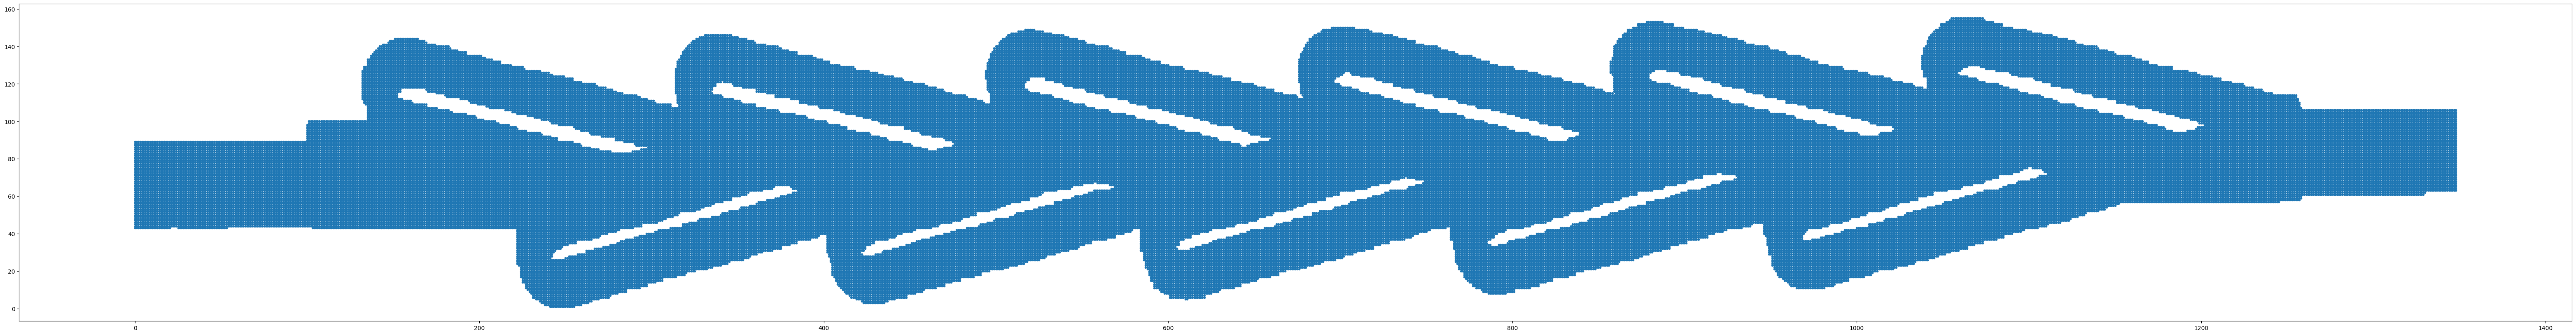

In [5]:
imagePoints = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
x, y = np.where(imagePoints == 0)
plt.figure(figsize=(80,10), dpi=100)
plt.plot(x, y, '.')
puntos = list(zip(x, y))

# Simulation

In [ ]:
# Lattice Boltzmann

plot_every = 50

def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
def main():
    Nx = 400
    Ny = 100
    tau = 0.53
    Nt = 3000
    
    # Initialize the lattice
    # lattice speeds and weights (D2Q9)
    NL = 9
    cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
    cys = np.array([0,1,1,0,-1,-1,-1,0,1])
    weights = np.array([4/9, 1/9, 1/36, 1/9, 1/36, 1/9, 1/36, 1/9, 1/36])
    
    # Initialize the fluid
    F = np.ones((Ny, Nx, NL)) + 0.01 * np.random.randn(Ny, Nx, NL)
    F[:, :, 3] = 2.3
    
    cylinder = np.full((Ny, Nx), False)
    
    for y in range(Ny):
        for x in range(Nx):
            if distance(Nx//4,Ny//2, x,y) < 13:
                cylinder[y][x] = True
    
    for it in range(Nt):
        print(it)

        for i, cx,cy in zip(range(NL), cxs, cys):
            F[:,:,i] = np.roll(F[:,:,i], cx, axis=1)
            F[:,:,i] = np.roll(F[:,:,i], cy, axis=0)
            
        bndryF = F[cylinder,:]
        bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]

        # Fluid variables
        rho = np.sum(F, 2)
        ux = np.sum(F * cxs, 2) / rho
        uy = np.sum(F * cys, 2) / rho
        
        F[cylinder, :] = bndryF
        ux[cylinder] = 0
        uy[cylinder] = 0
        
        # Collision step
        Feq = np.zeros(F.shape)
        for i,cx,cy,w in zip(range(NL), cxs, cys, weights):
            Feq[:,:,i] = rho*w*(
                1 + 3*(cx*ux + cy*uy) + 9*(cx*ux + cy*uy)**2 / 2 - 3*(ux**2 + uy**2)/2
            )
            
            F = F + -(1/tau)*(F-Feq)
            
        if it % plot_every == 0:
            plt.ion()
            plt.imshow(np.sqrt(ux**2 + uy**2))
            plt.pause(0.001)
            plt.cla()
            
if __name__ == '__main__':
    main()

(1349, 157)

In [ ]:
# Lattice Boltzmann
from configparser import Interpolation
import numpy as np
import matplotlib.pyplot as plt
import cv2

# plot_every = 50

# TESLA VALVE
image = cv2.imread("tesla_2.png", 0)
image = cv2.resize(image, (200, 50))
image = image.astype(np.float32)

image[image != 255] = 0
image = image/255

# CHANNEL
# image = cv2.imread("rect.png", 0)
# image = cv2.resize(image, (200, 50))
# plt.imshow(image, cmap='gray')
# image = image.astype(np.float32)

# image[image == 0] = 255
# image[image != 255] = 0
# image = image/255

# image = np.invert(image.astype(np.uint8)).astype(np.float32)
# imagePoints = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# y, x = np.where(imagePoints == 1)
# puntos = list(zip(y, x))


def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def main(cyl):
    Nx = 200
    Ny = 50
    tau = 0.53
    Nt = 10000

    # Initialize the lattice
    # lattice speeds and weights (D2Q9)
    Nl = 9
    cxs = np.array([0, 0, 1, 1, 1, 0, -1, -1, -1], dtype=np.int64)
    cys = np.array([0, 1, 1, 0, -1, -1, -1, 0, 1], dtype=np.int64)
    weights = np.array([4/9, 1/9, 1/36, 1/9, 1/36, 1/9, 1/36, 1/9, 1/36], dtype=np.longdouble)

    # Initialize the fluid
    F = np.ones((Ny, Nx, Nl), dtype=np.longdouble) + 0.01 * np.random.randn(Ny, Nx, Nl)
    F[:, :, 3] = 2.3

    cylinder = np.full((Ny, Nx), False)

    if cyl:
        for y in range(Ny):
            for x in range(Nx):

                if distance(Nx//4, Ny//2, x, y) < 13:
                    cylinder[y][x] = True

                # if (x, y) in puntos:
                #     cylinder[y][x] = True

    # To optimize performance, we only sum the cylinder image
    # with the binary image of the valve.
    cylinder = cylinder + image.astype(np.bool_)

    for it in range(Nt):
        # print(it)

        F[:, -1, [6, 7, 8]] = F[:, -2, [6, 7, 8]]
        F[:, 0, [2, 3, 4]] = F[:, 1, [2, 3, 4]]

        for i, cx, cy in zip(range(Nl), cxs, cys):
            F[:, :, i] = np.roll(F[:, :, i], cx, axis=1)
            F[:, :, i] = np.roll(F[:, :, i], cy, axis=0)

        bndryF = F[cylinder, :]
        bndryF = bndryF[:, [0, 5, 6, 7, 8, 1, 2, 3, 4]]

        # Fluid variables
        rho = np.sum(F, 2, dtype=np.double)
        ux = np.sum(F * cxs, 2, dtype=np.double) / rho
        uy = np.sum(F * cys, 2, dtype=np.double) / rho

        F[cylinder, :] = bndryF
        ux[cylinder] = 0
        uy[cylinder] = 0

        # Collision step
        Feq = np.zeros(F.shape, dtype=np.longdouble)
        for i, cx, cy, w in zip(range(Nl), cxs, cys, weights):
            Feq[:, :, i] = rho*w*(1 + 3*(cx*ux + cy*uy) + 9*(cx*ux + cy*uy)**2 / 2 - 3*(ux**2 + uy**2)/2)

        F = F + -(1/tau)*(F-Feq)

        if it % 10 == 0:

            plt.ion()

            # plt.subplot(1, 4, 1)
            plt.imshow(np.clip(np.sqrt(ux**2 + uy**2), 0, 1), cmap="hot", interpolation="bilinear")
            # vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
            # vorticity[cylinder] = np.nan
            # plt.imshow(vorticity, cmap='hot', interpolation='bilinear')

            # plt.subplot(1, 4, 2)
            # plt.imshow(np.clip(ux, 0, 1), cmap='hot', interpolation='bilinear')

            # plt.subplot(1, 4, 3)
            # plt.imshow(np.clip(uy, 0, 1), cmap='hot', interpolation='bilinear')

            # plt.subplot(1, 4, 4)
            # rho_aux = rho
            # rho_aux[cylinder] = 0
            # plt.imshow(rho, cmap='hot', interpolation='bilinear')

            # X, Y = np.meshgrid(range(Nx), range(Ny))
            #plt.pcolormesh(X, Y, rho, cmap="RdBu", shading='gouraud')
            plt.pause(0.000000000001)
            plt.cla()


if __name__ == "__main__":
    main(False)
